# OCN 350 HW 6
### Execute the following notebook. Save the output of the specified cells to a Word document and submit the Word document in Canvas.

(Corresponding to Rutgers 2020 Data Labs 2020 REU Bonus Activity 4 - Loading and Plotting Argo Float Data
**2020 Data Labs REU**

*Written by Sage Lichtenwalner, Rutgers University, June 9, 2020*  
Modified by Phil Bresnahan for UNCW's OCN 350 (Advanced Oceanography) class. 

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SUPScientist/datalab-reu-2020/blob/master/Activity_4_Argo_Data.ipynb)  
To create the Open in Colab link, append the link to the notebook hosted in GitHub, starting with the username, to https://colab.research.google.com/github/.

In this notebook we will cover some of basics of loading and plotting [Argo](https://www.aoml.noaa.gov/phod/argo/) float data in Python.

Because this dataset inclues a depth dimension, this allows us to demonstrate several addtional graph types you will commonly see in oceanography, including profiles and TS diagrams.

In [2]:
# Notebook setup
import xarray as xr
!pip install netcdf4

import matplotlib.pyplot as plt

# Argo Drifter Data
While time-series datasets at fixed points are very useful, the ocean is a deep place with a lot of interesting features and processes that vary with depth.  

Thus, it's also important to be able to visualize data in ways that emphasize the depth dimension, just as we've emphasized the time dimension above.

To do so, we're going to load data from the [Global Argo Float](http://www.argo.ucsd.edu) program, which had 3,962 active drifters around the world as of 6/6/2020. Here's the latest:
![Argo Floats](http://sio-argo.ucsd.edu/statusbig.gif)

Unfortunately, because of the complexity and international nature of the program, there isn't one "perfect" source to retrieve Argo data, or even to search for drifters you may be interested in.  However, I found the following sites helpful.

* [SOCCOM Floats](https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccom-float-visualization/) - A great interactive visualization of active floats in the Southern Ocean. You can also create quick plots and download CSV formatted data using [SOCCOMViz](https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccomviz/).
* [Global Argo Data Repository](https://www.ncei.noaa.gov/products/global-argo-data-repository) - A great place to grab drifter data files in netcdf format, once you know what drifter ID you want. (We'll actually use this site below.)
* [Euro Argo Map](https://fleetmonitoring.euro-argo.eu/dashboard) - A relatively new interactive portal to search for drifters and see their recent tracks and data.
* [A beginner's guide to accessing Argo data](http://www.argo.ucsd.edu/Argo_date_guide.html) - More information on the data.
* [Old Euro Argo Site](https://www.euro-argo.eu/Activities/Data-Management/Access-to-data-note-this-website-is-currently-under-revision-and-will-be-updated-in-2020) - May or may not work 

For the purposes of this activity, I picked an active drifter at random. Let's see what #6903547 can tell us about the ocean.

In [7]:
# Let's download a datafile to our serve (see the files tab)
# Visit https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/ to pick a float
!wget https://data.nodc.noaa.gov/argo/gadr/data/aoml/5904328/nodc_5904328_prof.nc

--2021-09-23 20:42:21--  https://data.nodc.noaa.gov/argo/gadr/data/aoml/5904328/nodc_5904328_prof.nc
Resolving data.nodc.noaa.gov (data.nodc.noaa.gov)... 205.167.25.171, 205.167.25.172, 205.167.25.177, ...
Connecting to data.nodc.noaa.gov (data.nodc.noaa.gov)|205.167.25.171|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5904328/nodc_5904328_prof.nc [following]
--2021-09-23 20:42:21--  https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/aoml/5904328/nodc_5904328_prof.nc
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.168, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362076 (1.3M) [application/x-netcdf]
Saving to: ‘nodc_5904328_prof.nc’

nodc_5904328_prof.n 100%[===================>]   1.30M  2.83MB/s    in 0.5s    

2021-09-23 20:42:22 (2.83

In [8]:
# Load the dataset using xarray
data = xr.open_dataset('nodc_5904328_prof.nc')
data

<xarray.Dataset>
Dimensions:                       (n_calib: 1, n_history: 0, n_levels: 47, n_param: 3, n_prof: 269)
Dimensions without coordinates: n_calib, n_history, n_levels, n_param, n_prof
Data variables: (12/65)
    data_type                     object ...
    format_version                object ...
    handbook_version              object ...
    reference_date_time           object ...
    date_creation                 object ...
    date_update                   object ...
    ...                            ...
    history_parameter             (n_history, n_prof) object ...
    history_start_pres            (n_history, n_prof) float32 ...
    history_stop_pres             (n_history, n_prof) float32 ...
    history_previous_value        (n_history, n_prof) float32 ...
    history_qctest                (n_history, n_prof) object ...
    crs                           int32 ...
Attributes: (12/49)
    title:                           Argo float vertical profile
    institution:                     FR GDAC
    source:                          Argo float
    history:                         2018-10-06T15:59:36Z csun convAGDAC.f90 ...
    references:                      https://www.nodc.noaa.gov/argo/
    user_manual_version:             3.1
    ...                              ...
    time_coverage_end:               2016-09-15T14:56:06Z
    time_coverage_duration:          point
    time_coverage_resolution:        point
    gadr_ConventionVersion:          GADR-3.0
    gadr_program:                    convAGDAC.f90
    gadr_programVersion:             1.2

As you can see, this dataset is a bit more complicated than our mooring timeseries dataset.  

Argo uses the dimensions n_levels (for depth) and n_prof (for time).

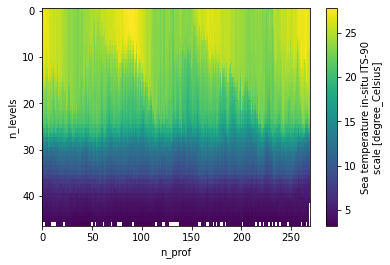

In [9]:
# Quick Timeseries Profile plot of Temperature
data.temp_adjusted.T.plot()
plt.gca().invert_yaxis()

*Note, when possible, you should use the `_adjusted` variables, as those have been corrected.  However, if you are interested in more recent data that hasn't been corrected yet, you will need to use the regular variable names (e.g. temp instead of temp_adjusted).*

## Profile Plot
Now that we have the dataset loaded, let's create a profile plot of a single profile.

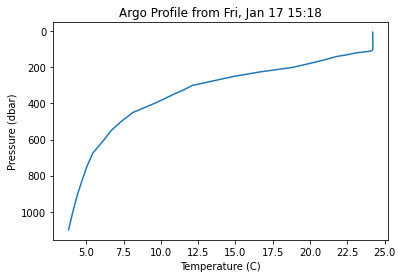

In [10]:
# Profile Plot
nprof = 25 #Specify a profile to plot
plt.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof])

plt.xlabel('Temperature (C)')
plt.ylabel('Pressure (dbar)')
plt.title('Argo Profile from %s' % data.juld[nprof].dt.strftime('%a, %b %d %H:%M').values)

plt.gca().invert_yaxis() #Flip the y-axis

Now let's get a little fancier and plot profiles of 2 variables.

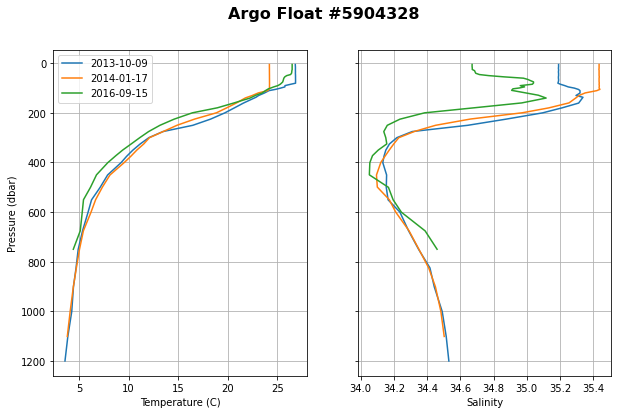

In [11]:
# Profile Plot
# Subplot example
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

nprof = 0 # Fist profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = 25 # Middle-ish profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

nprof = -1 # Last profile
ax1.plot(data.temp_adjusted[nprof], data.pres_adjusted[nprof], label=data.juld[nprof].dt.strftime('%Y-%m-%d').values)
ax2.plot(data.psal_adjusted[nprof], data.pres_adjusted[nprof])

ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.invert_yaxis()
ax1.legend()

# Add some gridlines
ax1.grid()
ax2.grid()

# Add a super title
fig.suptitle('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold', fontsize=16);

### HW 6, First Steps
1. Submit the graph above in your document for HW 6.
2. Go back up to the line where you ran the command `data = xr.open_dataset('nodc_5904328_prof.nc')` (but with your float ID) and write in a complete sentence what the `project_name` output and parameter list were (look at the `parameter` variable).  
The exercise doesn't end here; see below for more.

## T-S Diagram
Another popular plot in oceanography is the [T-S Diagram](https://en.wikipedia.org/wiki/Temperature–salinity_diagram), or Temperature-Salinity plot.  It is commonly used to diagnose water masses in the global ocean, and to compare density stability of a water column profile (especially when lines of constant density are also included).

Basically, it's just a scatterplot of temp and salinity.

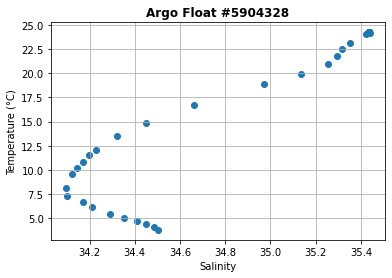

In [12]:
# TS Diagram
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof])
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.grid()

plt.title('Argo Float #%d' % data.platform_number[nprof].values, fontweight='bold');

That's nice, but we can also use a colored scatterplot to show the depth dimension.

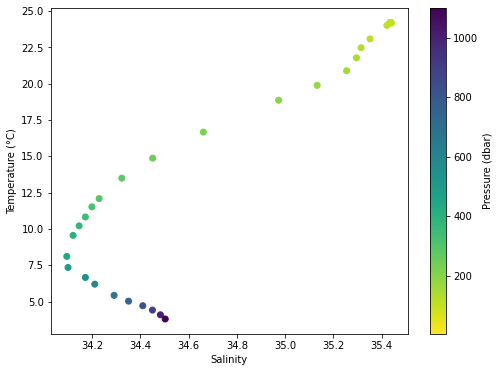

In [13]:
# T-S Diagram with depth
plt.figure(figsize=(8,6))

nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')

cbh = plt.colorbar();
cbh.set_label('Pressure (dbar)')

We used the default python colorbar for this plot (viridis), but there is a much larger [colormap collection](https://matplotlib.org/users/colormaps.html) available.

With a little bit more code, we can add lines of constant density.  This was adapted from the [Ocean Python T-S Diagram](https://oceanpython.org/2013/02/17/t-s-diagram/) example, but we will use meshgrid instead, since it makes the code a bit simpler.


To calculate density, we will need the wonderful [seawater](https://pythonhosted.org/seawater/index.html) library.

In [14]:
!pip install seawater
import seawater
import numpy as np

  Created wheel for seawater: filename=seawater-3.3.4-py3-none-any.whl size=26452 sha256=4e58fe58a8b6b83abc3351af683b07b80c4abcb98bcd049fd14eb501d10004fa
  Stored in directory: /root/.cache/pip/wheels/50/ba/3a/a29e0f75de94f9004fb1ce1dfa38bda536b1be682a90339744
Successfully built seawater


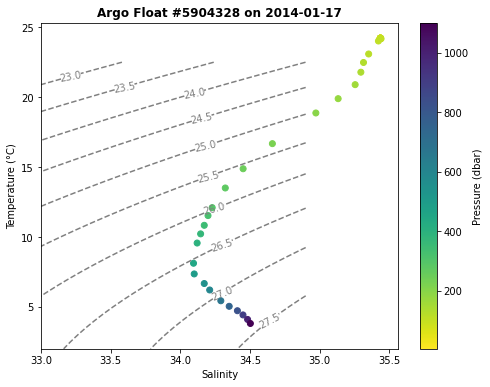

In [15]:
# TS Diagram with density contours
plt.figure(figsize=(8,6))

# Calculate the density lines
x = np.arange(33, 35, .1)
y = np.arange(2, 23, .5)
X, Y = np.meshgrid(x, y)
Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed', levels=np.arange(22,30,.5))
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.1f')

# Plot the data
nprof = 25 #Selected profile
plt.scatter(data.psal_adjusted[nprof], data.temp_adjusted[nprof], c=data.pres_adjusted[nprof], cmap='viridis_r')
plt.xlabel('Salinity');
plt.ylabel('Temperature (°C)')
plt.title('Argo Float #%d on %s' % (data.platform_number[nprof].values, data.juld[nprof].dt.strftime('%Y-%m-%d').values), fontweight='bold');

# Add a colorbar
cbh = plt.colorbar(label='Pressure (dbar)');

## Float Track Map

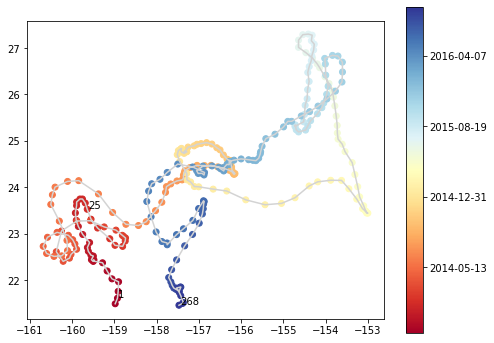

In [16]:
# Simple map of a float track
plt.figure(figsize=(8,6))
plt.plot(data.longitude, data.latitude, c='lightgrey')
plt.scatter(data.longitude, data.latitude, c=data.juld, cmap='RdYlBu')

# Crude profile labels
for jj in [1,25,-1]:
  plt.text(data.longitude[jj]+.02, data.latitude[jj]+.02, data.n_prof[jj].values)

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

# Set the aspect ratio to pseudo-Mercator
plt.gca().set_aspect(1 / np.cos(np.deg2rad( np.mean(plt.ylim()) )))

### HW 6, Next Steps
1. Submit the track map figure from above in your document for HW 6.
2. Next, calculate a single profile's average temperature.
3. Calculate the heat that would have to be added or lost to/from a 2000 m x 1 m x 1 m (or 2,000 m<sup>3</sup>) rectangular prism of water with that temperature profile to bring it to 10 <sup>o</sup>C. Refer to your notes from HW 2 for the equation.
4. Write a complete sentence with the average temperature and the amount of heat added/lost. 
5. Write in your submission the lines of code that you use to (1) calculate the average temperature and (2) calculate the heat added/lost.

Hints:
- Recall from above that the profile of temperature for profile number `nprof` is `data.temp_adjusted[nprof]`
- There are many ways to calculate an average in Python, but I recommend using the function from numpy (remember we imported numpy as np) called nanmean. So you could write a line of code that was something like `my_profile_average = np.nanmean(my_profile_temps)` but instead of `my_profile_temps`, you should use the chunk of code from the first bullet under Hints above that has your profile temperatures. 
- write a separate line of code that calculates the heat gain/loss following the equation from HW 2.
- Use `print` statements to print the output of your calculations to the screen

For another example, check out this [notebook](https://github.com/ooi-data-lab/data-lab-workshops/blob/master/March2019/Activities/DL_March_Anoxia_v4.ipynb) which plots a glider track, colored by date, along with lat/lon labels and station locations.